In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,cases
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,2
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18,2016,4,0


In [4]:
df.shape

(174103, 25)

In [5]:
# Total no of duplicate rows
df.duplicated().sum()

71058

In [6]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [7]:
df.shape

(103045, 25)

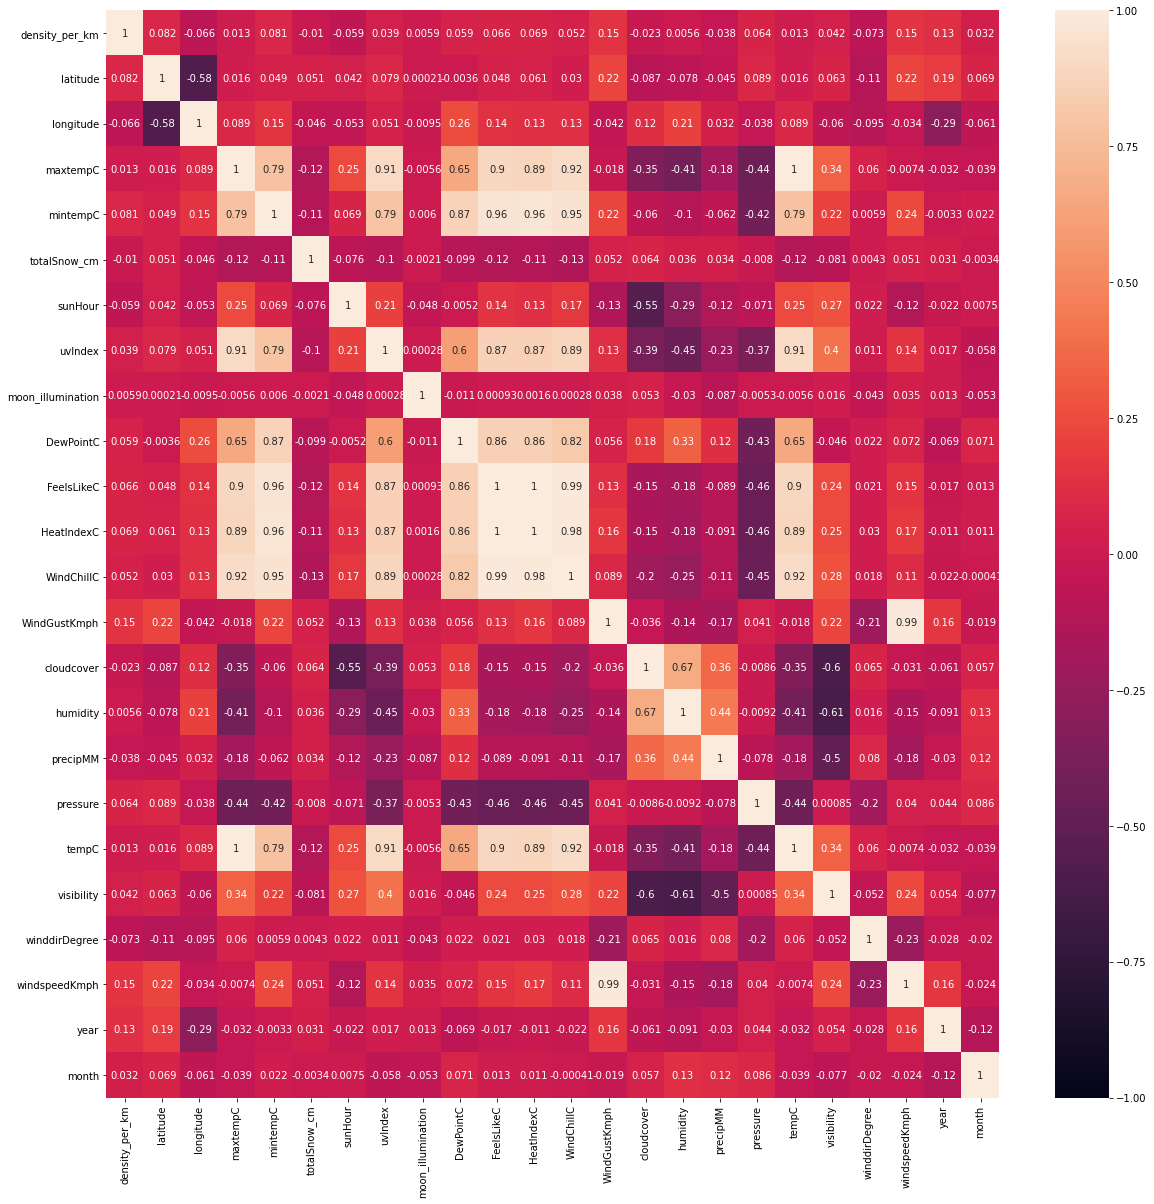

In [10]:
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True , vmax=1, vmin=-1)

In [12]:
threshold=0.8

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(df.iloc[:,:-1],threshold)

{'DewPointC',
 'FeelsLikeC',
 'HeatIndexC',
 'WindChillC',
 'tempC',
 'uvIndex',
 'windspeedKmph'}